This notebook contains the code comparing my own KNN ensemble v1 and v2


In [1]:
# import libraries
from surprise import Dataset
from own_algorithms.UserItemKNN import UserItemKNN
from own_algorithms.UserItemKNNv2 import UserItemKNNv2
from own_algorithms.helper import testing_algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# load data and split into A/B sets, A for CFV and B for unbiased testing
# Load the data using the built-in function
data = Dataset.load_builtin('ml-100k')
raw_ratings= data.raw_ratings

random.seed(2001)
np.random.seed(2001)
random.shuffle(raw_ratings)

# create threshold for unseen, 80-20
cutoff = int(0.8 * len(raw_ratings))
A_raw= raw_ratings[:cutoff]
B_raw= raw_ratings[cutoff:]

# data is now only set A ratings
data.raw_ratings= A_raw

In [3]:
v1= testing_algorithm(UserItemKNN(), data)
v2= testing_algorithm(UserItemKNNv2(), data)

In [4]:
print(v1)
print(v2)

[0.97662228 0.95380889 0.77932996 1.31981606 3.17798615]
[0.9715661  0.94395869 0.77783036 1.4122004  3.4423924 ]


In [5]:
knn_data= pd.read_csv('./algo_data/KNNBasic_defaultK_User_Item.csv')
knn_data

,Algorithm,RMSE,MSE,MAE,Fit Time,Predict Time
0,User-Based,0.989869,0.979859,0.783560,0.288202,1.676250
1,Item-Based,0.989914,0.979943,0.782299,0.207619,1.445565


In [6]:
new_row={'Algorithm': 'Hybrid', 'RMSE':v1[0], 'MSE':v1[1], 'MAE':v1[2], 'Fit Time':v1[3], 'Predict Time':v1[4]}
results = knn_data.append(new_row, ignore_index=True)
new_row={'Algorithm': 'Hybrid_V2', 'RMSE':v2[0], 'MSE':v2[1], 'MAE':v2[2], 'Fit Time':v2[3], 'Predict Time':v2[4]}
results = results.append(new_row, ignore_index=True)


C:\Users\harvey\AppData\Local\Temp\ipykernel_21308\4163075094.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = knn_data.append(new_row, ignore_index=True)
C:\Users\harvey\AppData\Local\Temp\ipykernel_21308\4163075094.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index=True)


In [7]:
results
results.to_csv('./algo_data/KNN_UB_IB_HB.csv')

In [8]:
# pull the accuracy values from the results dataframe
ub= results.loc[0].values[1:3]
ib= results.loc[1].values[1:3]
hb= results.loc[2].values[1:3]
hb2= results.loc[3].values[1:3]


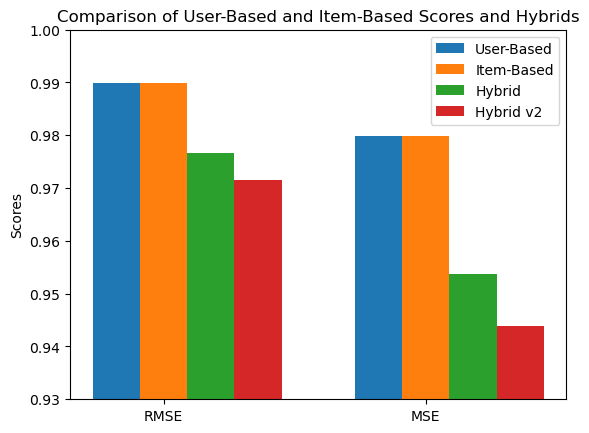

In [9]:
labels = ['RMSE', 'MSE']
x = np.arange(len(labels))
width = 0.18

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, ub, width, label='User-Based')
rects2 = ax.bar(x, ib, width, label='Item-Based')
rects3 = ax.bar(x + width, hb, width, label='Hybrid')
rects4 = ax.bar(x + 2*width, hb2, width, label='Hybrid v2')


# add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of User-Based and Item-Based Scores and Hybrids')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0.93,1)


# add the score values above each bar

plt.savefig('./KNN Graphs/UB_IB_HB_comp.png')
plt.show()